# Data Exploration and Preprocessing
#In this section, we load the data, explore its structure, and preprocess it for further analysis.

In [1]:
#1.Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
%matplotlib inline






In [3]:
#2.Load the Data


data_path = '/Users/utkarsh/Desktop/readEstdata.csv'
data = pd.read_csv(data_path)




/var/folders/zw/6z44k3dj28b0lvg4nttddlh00000gn/T/ipykernel_29498/3275014459.py:5: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path)


In [4]:
#3. Initial Data Exploration

# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())



   Serial Number  List Year Date Recorded     Town                Address  \
0        2020348       2020       9/13/21  Ansonia        230 WAKELEE AVE   
1          20002       2020       10/2/20  Ashford        390 TURNPIKE RD   
2         210317       2021        7/5/22     Avon        53 COTSWOLD WAY   
3         200212       2020        3/9/21     Avon       5 CHESTNUT DRIVE   
4         200243       2020       4/13/21     Avon  111 NORTHINGTON DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0          150500     325000.0       0.4630    Commercial              NaN   
1          253000     430000.0       0.5883   Residential    Single Family   
2          329730     805000.0       0.4096   Residential    Single Family   
3          130400     179900.0       0.7248   Residential            Condo   
4          619290     890000.0       0.6958   Residential    Single Family   

  Non Use Code Assessor Remarks OPM remarks  \
0          NaN       

# Data Preprocessing
We drop unnecessary columns, handle missing values, and convert columns to appropriate data types.



In [5]:
# Drop unnecessary columns
columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location', 'Date Recorded', 'Address']
data = data.drop(columns=columns_to_drop, errors='ignore')

# Remove rows with null values in specified columns
data = data.dropna(subset=['Town', 'Residential Type', 'Sale Amount', 'List Year'])

# Convert 'List Year' to integer if it's not already
data['List Year'] = data['List Year'].astype(int)

# Ensure 'Sale Amount' is a float
data['Sale Amount'] = data['Sale Amount'].astype(float)


# Data Visualization

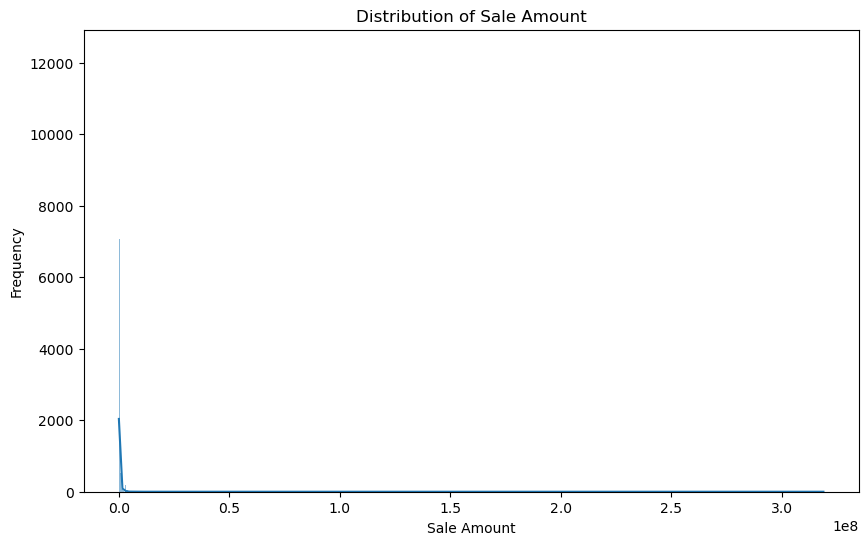

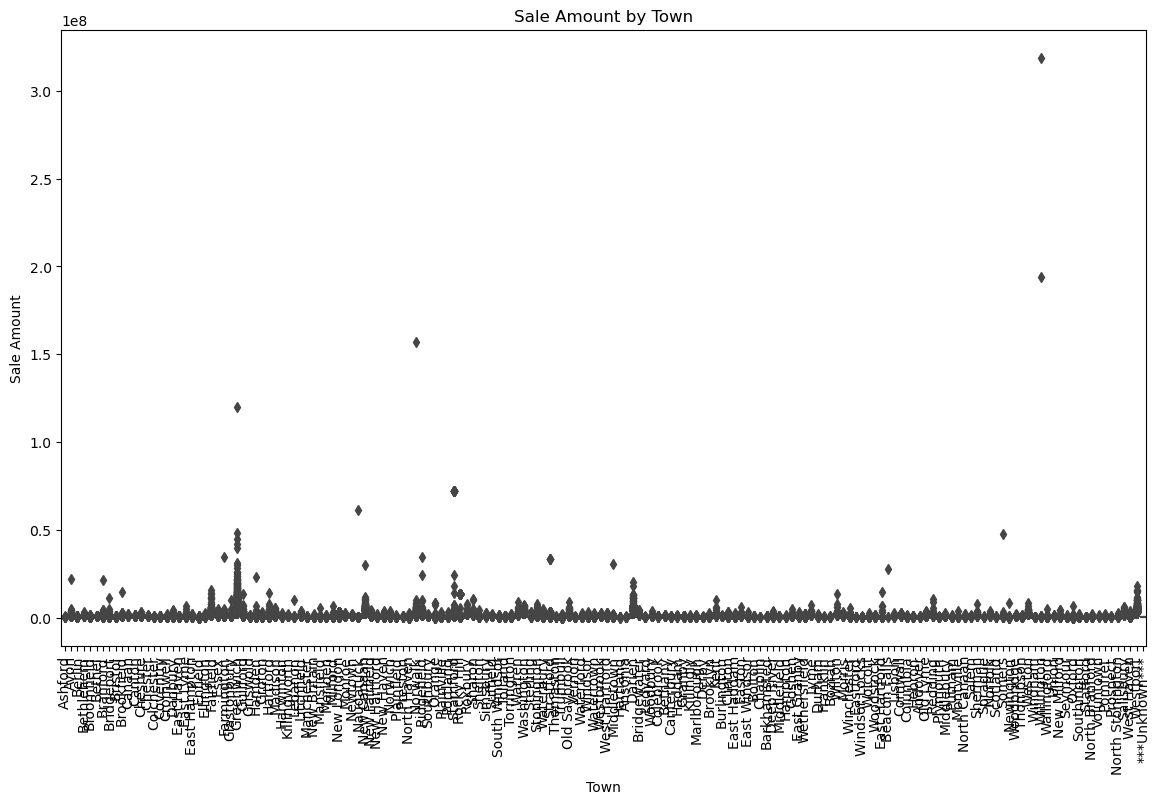

In [6]:

# Distribution of Sale Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Sale Amount'], kde=True)
plt.title('Distribution of Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Sale Amount by Town
plt.figure(figsize=(14, 8))
sns.boxplot(x='Town', y='Sale Amount', data=data)
plt.title('Sale Amount by Town')
plt.xticks(rotation=90)
plt.show()


# Feature Selection and Engineering


In [7]:

#We select relevant features and encode categorical variables using LabelEncoder.


# Feature Selection
features = ['Town', 'Residential Type', 'List Year']
X = data[features]
y = data['Sale Amount']

# Label Encoding
label_encoder_town = LabelEncoder()
label_encoder_residential_type = LabelEncoder()

X['Town'] = label_encoder_town.fit_transform(X['Town'])
X['Residential Type'] = label_encoder_residential_type.fit_transform(X['Residential Type'])

# Display Encoded Features
print(X.head())


   Town  Residential Type  List Year
1     3                 2       2020
2     4                 2       2021
3     4                 0       2020
4     4                 2       2020
5     4                 2       2020


/var/folders/zw/6z44k3dj28b0lvg4nttddlh00000gn/T/ipykernel_29498/1814488929.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Town'] = label_encoder_town.fit_transform(X['Town'])
/var/folders/zw/6z44k3dj28b0lvg4nttddlh00000gn/T/ipykernel_29498/1814488929.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Residential Type'] = label_encoder_residential_type.fit_transform(X['Residential Type'])


# Model Training and Evaluation
We train a Linear Regression model, evaluate its performance, and save the trained model.

In [8]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")

# Save the Model
joblib.dump(model, 'linear_regression_model.joblib')



Mean Squared Error: 731977771368.0433
R-squared: 0.0008508230066728295
Cross-Validation Scores: [-5.29792531e-03 -3.72141015e-03  7.66009286e-05 -5.27374433e-03
 -4.71038139e-03]
Mean CV Score: -0.003785372052371039


['linear_regression_model.joblib']